In [1]:
%%script C:\Users\Jan Catherine\AppData\Local\Programs\Python\Python38\python.exe
import sys
print(sys.version)

3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]


In [2]:
pwd

'C:\\Users\\Jan Catherine\\Documents\\CMSC Notes\\CMSC 190 Part 2\\Codes\\CNN'

In [3]:
import os
os.chdir('../../Data_Collection_02/02_Preprocessing/05_CNN')

In [4]:
#pip install tensorflow

In [5]:
#importing libraries
"""
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
"""

'\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Activation, Flatten\nfrom keras.layers import Convolution2D, MaxPooling2D\nfrom sklearn.model_selection import train_test_split\nimport pandas as pd\nimport numpy as np\n'

In [6]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import KFold

#import pydot

In [7]:
dataset = pd.read_csv('01_Title_Train.csv', encoding='latin-1')
testdata = pd.read_csv('01_Title_Test.csv', encoding='latin-1')

train_data = dataset
test_data = testdata


train_data.dropna(axis=0, how ='any', inplace=True)
train_data['Num_words_title'] = train_data['Title'].apply(lambda x:len(str(x).split()))
#train_data['Num_words_desc'] = train_data['Description'].apply(lambda x:len(str(x).split()))
print('-------Train data--------')
print(train_data['Fake'].value_counts())
print(len(train_data))
print('-------------------------')

max_train_title_length  = train_data['Num_words_title'].max()
#max_train_desc_length  = train_data['Num_words_desc'].max()


test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_title'] = test_data['Title'].apply(lambda x:len(str(x).split())) 

max_test_title_length  = test_data['Num_words_title'].max()

print('-------Test data--------')
print(test_data['Fake'].value_counts())
print(len(test_data))
print('-------------------------')

print('Train Max Length :'+str(max_train_title_length))
print('Test Max Sentence Length :'+str(max_test_title_length))


-------Train data--------
0    5760
1     691
Name: Fake, dtype: int64
6451
-------------------------
-------Test data--------
0    1428
1     184
Name: Fake, dtype: int64
1612
-------------------------
Train Max Length :20
Test Max Sentence Length :17


In [8]:
train_data.head()

,Title,Fake,Num_words_title
0,key arsenal rural India pandemic fight,0,6
1,Coronavirus banks : Implications leaders,0,5
2,Nail Salons Massage Parlors Tattoo Studios,0,6
3,Risk SARSCoV2 transmission aerosols rational,0,5
4,House prices Spain : COVID19 affected idealista,0,7


In [9]:
num_words = 11718


tokenizer = Tokenizer(num_words=num_words, oov_token="unk")
tokenizer.fit_on_texts(train_data['Title'].tolist())

print(str(tokenizer.texts_to_sequences(['5G Global bill airfare'])))

[[4, 44, 38, 1]]


In [ ]:
#df_class_0 = train_data[train_data['Fake'] == 0]
#df_class_1 = train_data[train_data['Fake'] == 1]

In [10]:
"""word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(f'Vocabulary Size : {vocab_size}')
"""

"word_index = tokenizer.word_index\nvocab_size = len(word_index) + 1\nprint(f'Vocabulary Size : {vocab_size}')\n"

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['Title'].tolist(),\
                                                      train_data['Fake'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['Fake'].tolist(),\
                                                      random_state=0)

print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['Title'].tolist()) )

x_train = pad_sequences(x_train, padding='post', maxlen=90)
x_valid = pad_sequences(x_valid, padding='post', maxlen=90)
x_test = pad_sequences(x_test, padding='post', maxlen=90)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels, 2))
#print(train_labels)
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels, 2))


test_labels = le.transform(test_data['Fake'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels, 2))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:5805
Class distributionCounter({0: 5183, 1: 622})
Valid data len:646
Class distributionCounter({0: 577, 1: 69})
[ 58 123 895  40   3   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


C:\Users\Jan Catherine\AppData\Local\Temp\ipykernel_2964\98834354.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
C:\Users\Jan Catherine\AppData\Local\Temp\ipykernel_2964\98834354.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
C:\Users\Jan Catherine\AppData\Local\Temp\ipykernel_2964\98834354.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

In [12]:
test_data.head()

,Title,Fake,Num_words_title
0,Coronavirus fact check : recycled air planes,0,7
1,Coronavirus Italy travel advice : safe travel ...,0,9
2,Wayne Rooney pays tribute wife Coleen wedding ...,0,11
3,Trump blame game China disguise massive COVID1...,0,10
4,COVID19 Testing Locations,0,3


In [13]:
"""print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])
"""

"print(y_train[:10])\ntrain_labels = le.fit_transform(y_train)\nprint('Text to number')\nprint(train_labels[:10])\ntrain_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))\nprint('Number to category')\nprint(train_labels[:10])\n"

In [14]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count = 0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==3:
        break  


======Train dataset ====
tf.Tensor(
[ 58 123 895  40   3   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(90,), dtype=int32) tf.Tensor([1. 0.], shape=(2,), dtype=float32)
tf.Tensor(
[   2    4 1231  196  127   35    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0], shape=(90,), dtype=int32) tf.Tensor([1. 0.], shape=(2,)

In [15]:
#CNN MODEL

max_features = 11718
embedding_dim = 64 #same as URLNet
sequence_length = 90


inputs = np.concatenate((x_train,x_valid), axis=0)
targets = np.concatenate((train_labels, valid_labels), axis=0)

#regularizer prevents overfitting
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5)) #to reduce overfitting

#final classification, 2 classes
model.add(tf.keras.layers.Dense(2, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 64)            750016    
                                                                 
 conv1d (Conv1D)             (None, 88, 128)           24704     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 774978 (2.96 MB)
Trainable params: 774978 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
epochs = 100
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/100


C:\Users\Jan Catherine\anaconda3\lib\site-packages\keras\src\backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


46/46 [==============================] - 3s 46ms/step - loss: 0.6280 - categorical_accuracy: 0.8734 - val_loss: 0.4120 - val_categorical_accuracy: 0.8932
Epoch 2/100
46/46 [==============================] - 2s 43ms/step - loss: 0.3891 - categorical_accuracy: 0.8929 - val_loss: 0.3606 - val_categorical_accuracy: 0.8932
Epoch 3/100
46/46 [==============================] - 2s 46ms/step - loss: 0.3351 - categorical_accuracy: 0.8958 - val_loss: 0.3020 - val_categorical_accuracy: 0.9040
Epoch 4/100
46/46 [==============================] - 2s 44ms/step - loss: 0.2739 - categorical_accuracy: 0.9177 - val_loss: 0.2617 - val_categorical_accuracy: 0.9365
Epoch 5/100
46/46 [==============================] - 2s 44ms/step - loss: 0.2188 - categorical_accuracy: 0.9449 - val_loss: 0.2521 - val_categorical_accuracy: 0.9381
Epoch 6/100
46/46 [==============================] - 2s 46ms/step - loss: 0.1840 - categorical_accuracy: 0.9652 - val_loss: 0.2559 - val_categorical_accuracy: 0.9412
Epoch 7/100
46/4

In [17]:
history.history

{'loss': [0.6280359625816345,
  0.3891156315803528,
  0.3350659906864166,
  0.27391210198402405,
  0.21882997453212738,
  0.1839955598115921,
  0.1583854705095291,
  0.14056265354156494,
  0.1308654397726059,
  0.12268862128257751,
  0.11765716969966888,
  0.11407655477523804,
  0.10927116870880127,
  0.10592997819185257,
  0.10499410331249237,
  0.10309037566184998,
  0.10198266059160233,
  0.10104607045650482,
  0.09931045770645142,
  0.09846346825361252,
  0.09914935380220413,
  0.09894979745149612,
  0.09781229496002197,
  0.09651470929384232,
  0.09585019946098328,
  0.095575250685215,
  0.09497274458408356,
  0.09439331293106079,
  0.09379684925079346,
  0.09310354292392731,
  0.09373293817043304,
  0.09347785264253616,
  0.09232084453105927,
  0.09195054322481155,
  0.09284892678260803,
  0.09332145750522614,
  0.09119880199432373,
  0.09115318208932877,
  0.09228727966547012,
  0.09136996418237686,
  0.0911402702331543,
  0.09085851162672043,
  0.09047555923461914,
  0.08995538

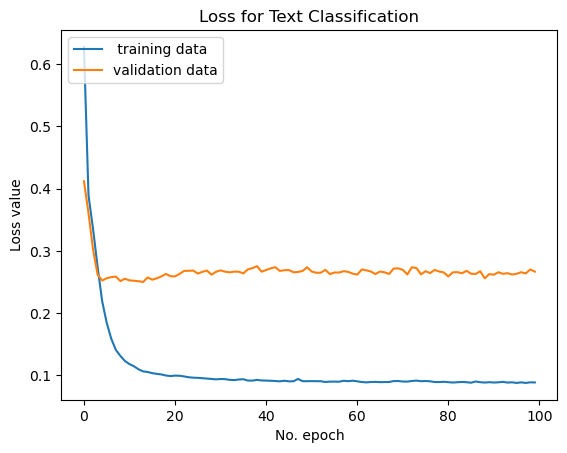

In [18]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

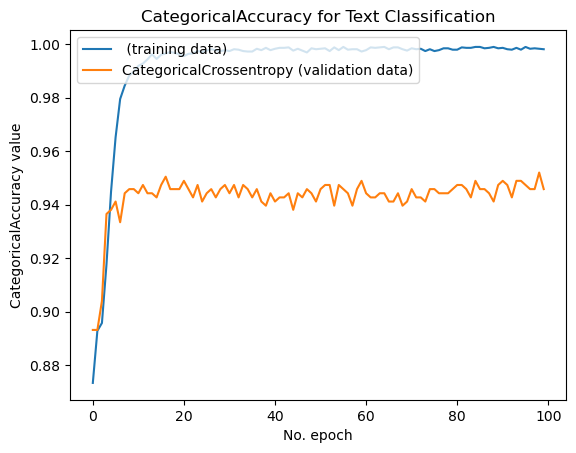

In [19]:
plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [20]:
model.save('C:\\Users\\Jan Catherine\\Documents\\CMSC Notes\\2022-2023 1st Sem\\CMSC 190\\Codes') 
json_string = tokenizer.to_json()

INFO:tensorflow:Assets written to: C:\Users\Jan Catherine\Documents\CMSC Notes\2022-2023 1st Sem\CMSC 190\Codes\assets


INFO:tensorflow:Assets written to: C:\Users\Jan Catherine\Documents\CMSC Notes\2022-2023 1st Sem\CMSC 190\Codes\assets


In [21]:
import json
with open('C:\\Users\\Jan Catherine\\Documents\\CMSC Notes\\2022-2023 1st Sem\\CMSC 190\\Codes\\tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [22]:
#reload model

new_model = tf.keras.models.load_model('C:\\Users\\Jan Catherine\\Documents\\CMSC Notes\\2022-2023 1st Sem\\CMSC 190\\Codes')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 64)            750016    
                                                                 
 conv1d (Conv1D)             (None, 88, 128)           24704     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 774978 (2.96 MB)
Trainable params: 774978 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [23]:
with open('C:\\Users\\Jan Catherine\\Documents\\CMSC Notes\\2022-2023 1st Sem\\CMSC 190\\Codes\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [24]:
x_test  = np.array( tokenizer1.texts_to_sequences(test_data['Title'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=90)

KeyError: 'TitleDesc'

In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

In [ ]:
test_data['pred_fake']= predict_results
test_data['pred_fake'] = np.where((test_data.pred_fake == '0'),0,test_data.pred_fake)
test_data['pred_fake'] = np.where((test_data.pred_fake == '1'),1,test_data.pred_fake)

In [ ]:
print(type(test_data['Fake']))
test_data['Fake'].head()


In [ ]:
print(type(test_data['pred_fake']))
test_data['pred_fake'].head()

In [ ]:
labels = [0, 1]
    
print(classification_report(test_data['Fake'].tolist(),test_data['pred_fake'].tolist(),labels=labels))

In [ ]:
precisionscore = precision_score(y_test, new_model.predict(x_test))
accuracyscore = accuracy_score(y_test, new_model.predict(x_test))
recallscore = recall_score(y_test, new_model.predict(x_test))
f1score = f1_score(y_test, new_model.predict(x_test))
cm = confusion_matrix(y_test, new_model.predict(x_test))

print(precisionscore, accuracyscore, recallscore, f1score, cm)